In [213]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

hakemisto = './data/'

sisalto = os.listdir(hakemisto)
print(sisalto)

# Ladataan data 
df_train = pd.read_csv('./data/Tampere_BNB_training_listing.csv')
df_test = pd.read_csv('./data/Tampere_BNB_testing_listing.csv')

['Global_Landslide_Catalog_Export.csv:Zone.Identifier', 'Tampere_BNB_testing_listing.csv', 'Global_Landslide_Catalog_Export.csv', 'Tampere_BNB_training_listing.csv', 'Tampere_BNB_training_listing.csv:Zone.Identifier', 'Tampere_BNB_testing_listing.csv:Zone.Identifier', 'catalog.csv:Zone.Identifier', 'NFL Play by Play 2009-2016 (v3).csv', 'catalog.csv', 'Building_Permits.csv:Zone.Identifier', 'NFL Play by Play 2009-2016 (v3).csv:Zone.Identifier', 'Building_Permits.csv']


In [214]:
df_train.describe()


,m2,Rv,Pituusaste,Leveysaste,Hinta
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,60.947870,1990.896296,23.796642,61.485415,283.833333
std,28.571568,26.501165,0.102356,0.026275,140.907735
min,12.000000,1880.000000,23.581308,61.430235,36.000000
25%,40.500000,1970.000000,23.730274,61.466342,192.000000
50%,56.500000,1990.000000,23.793908,61.493092,255.000000
75%,75.000000,2018.000000,23.854114,61.501942,339.000000
max,259.000000,2024.000000,24.070784,61.627915,1299.000000


In [215]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaupunginosa    1080 non-null   object 
 1   Huoneisto       1080 non-null   object 
 2   Talot.          1080 non-null   object 
 3   m2              1080 non-null   float64
 4   Rv              1080 non-null   int64  
 5   Krs             1018 non-null   object 
 6   Hissi           1080 non-null   object 
 7   Kunto           786 non-null    object 
 8   Asunnon tyyppi  1080 non-null   object 
 9   Pituusaste      1080 non-null   float64
 10  Leveysaste      1080 non-null   float64
 11  Hinta           1080 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 101.4+ KB


In [216]:
df_train.head(100)

,Kaupunginosa,Huoneisto,Talot.,m2,Rv,Krs,Hissi,Kunto,Asunnon tyyppi,Pituusaste,Leveysaste,Hinta
0,Niemenranta,"2h , kt, s, p",kt,50.0,2020,2/6,on,hyvä,Kaksi huonetta,23.696606,61.524269,300
1,Vuores,1 H + KT,kt,28.0,2018,1/4,on,hyvä,Yksiö,23.804092,61.433185,162
2,Niemenranta,"3 h , kt , s, p",kt,63.0,2020,3/6,on,hyvä,Kolme huonetta,23.696636,61.519368,363
3,Keskusta,3h+k+vh+kph/wc+...,kt,84.0,1964,5/7,on,NaN,Kolme huonetta,24.062369,61.463896,483
4,Hervanta,"2 h, kk, s, ph, p",kt,52.0,1995,6/6,on,tyyd.,Kaksi huonetta,23.848751,61.446601,174
5,Kaleva,3h+k+et+kph/wc+...,kt,56.0,1958,4/4,ei,NaN,Kolme huonetta,23.806857,61.498845,276
6,Takahuhti,"2h, kt",kt,40.0,2022,2/6,on,NaN,Kaksi huonetta,23.858188,61.499247,246
7,Kaleva,1h+kt+kph+lasit...,kt,23.5,2022,7/13,ei,hyvä,Yksiö,23.806872,61.499177,231
8,Kämmenniemi,"2h,k,s",rt,45.0,1989,1/1,ei,hyvä,Kaksi huonetta,23.837523,61.625291,165
9,Ratina,1h+kk,kt,38.0,2011,4/5,on,NaN,Yksiö,23.765501,61.493427,309


In [217]:
puuttuvat_arvot = df_train.isnull().sum()
puuttuvat_arvot = puuttuvat_arvot[puuttuvat_arvot > 0]
print(f"Puuttuvat arvot:\n {puuttuvat_arvot}")

Puuttuvat arvot:
 Krs       62
Kunto    294
dtype: int64


In [218]:
puuttuvat_arvot_prosentteina = (puuttuvat_arvot / len(df_train)) * 100
print(f"Puuttuvat arvot prosentteina:\n {puuttuvat_arvot_prosentteina}")

Puuttuvat arvot prosentteina:
 Krs       5.740741
Kunto    27.222222
dtype: float64


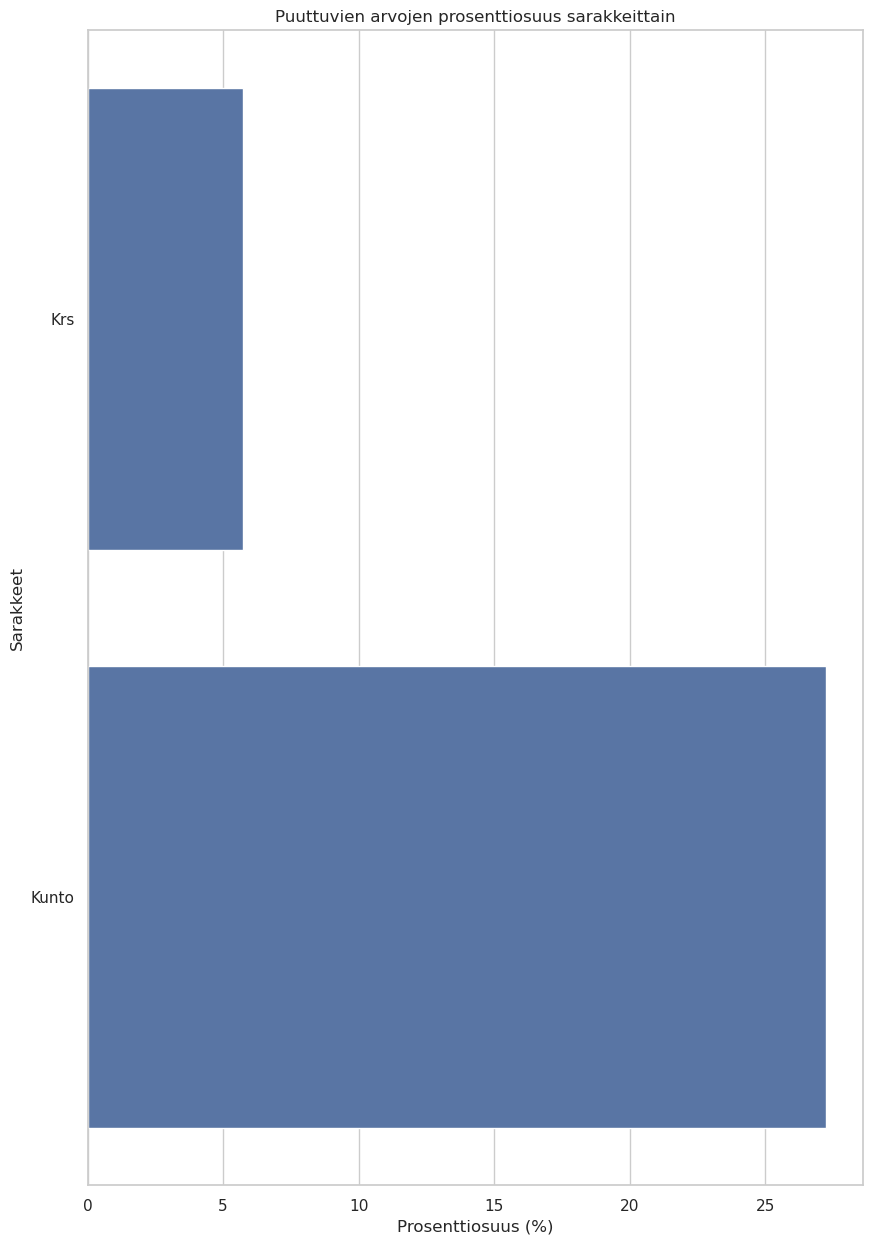

In [219]:
puuttuvat_arvot_prosentteina = puuttuvat_arvot_prosentteina.sort_values() # Järjestellään kasvavaan järjestykseen

# Visualisointi 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 15))  # Säädä kokoa tarpeen mukaan
sns.barplot(x=puuttuvat_arvot_prosentteina, y=puuttuvat_arvot_prosentteina.index)
plt.title('Puuttuvien arvojen prosenttiosuus sarakkeittain')
plt.xlabel('Prosenttiosuus (%)')
plt.ylabel('Sarakkeet')
plt.show()

In [220]:
# Muutetaan Rv sarakkeen tyyppi kokonaisluvuksi
df_train['Rv'] = df_train['Rv'].astype(int)

In [221]:
df_train['Rv'].head(10)

0    2020
1    2018
2    2020
3    1964
4    1995
5    1958
6    2022
7    2022
8    1989
9    2011
Name: Rv, dtype: int64

<Axes: xlabel='Rv'>

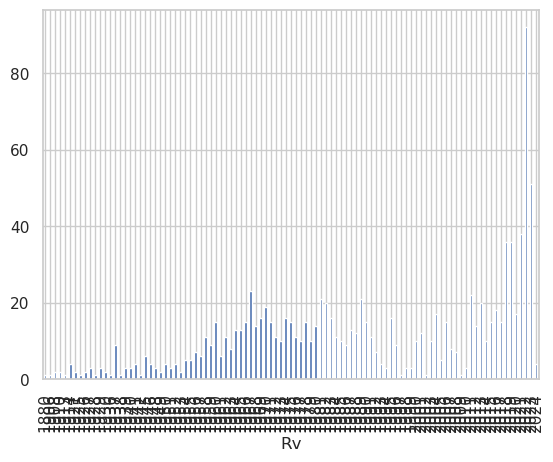

In [222]:
df_train['Rv'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Kunto'>

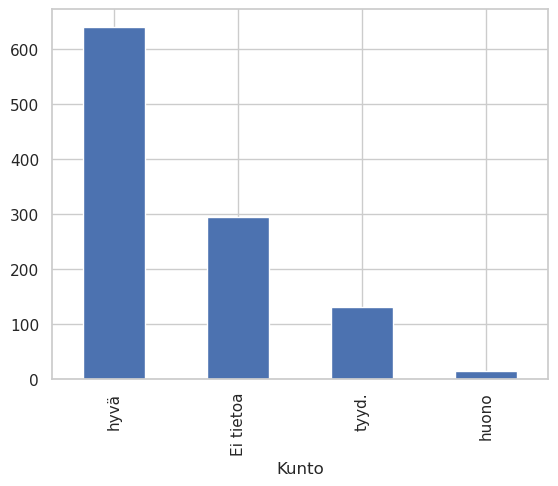

In [223]:
df_train['Kunto'] = df_train['Kunto'].fillna('Ei tietoa')
df_train['Kunto'].value_counts().plot(kind='bar')

In [224]:
kunto_mappaus = {
    'Ei tietoa': 0,
    'huono': 1,
    'tyyd.': 2,
    'hyvä': 3,
}
df_train['Kunto'] = df_train['Kunto'].map(kunto_mappaus)
df_train.head(10)

,Kaupunginosa,Huoneisto,Talot.,m2,Rv,Krs,Hissi,Kunto,Asunnon tyyppi,Pituusaste,Leveysaste,Hinta
0,Niemenranta,"2h , kt, s, p",kt,50.0,2020,2/6,on,3,Kaksi huonetta,23.696606,61.524269,300
1,Vuores,1 H + KT,kt,28.0,2018,1/4,on,3,Yksiö,23.804092,61.433185,162
2,Niemenranta,"3 h , kt , s, p",kt,63.0,2020,3/6,on,3,Kolme huonetta,23.696636,61.519368,363
3,Keskusta,3h+k+vh+kph/wc+...,kt,84.0,1964,5/7,on,0,Kolme huonetta,24.062369,61.463896,483
4,Hervanta,"2 h, kk, s, ph, p",kt,52.0,1995,6/6,on,2,Kaksi huonetta,23.848751,61.446601,174
5,Kaleva,3h+k+et+kph/wc+...,kt,56.0,1958,4/4,ei,0,Kolme huonetta,23.806857,61.498845,276
6,Takahuhti,"2h, kt",kt,40.0,2022,2/6,on,0,Kaksi huonetta,23.858188,61.499247,246
7,Kaleva,1h+kt+kph+lasit...,kt,23.5,2022,7/13,ei,3,Yksiö,23.806872,61.499177,231
8,Kämmenniemi,"2h,k,s",rt,45.0,1989,1/1,ei,3,Kaksi huonetta,23.837523,61.625291,165
9,Ratina,1h+kk,kt,38.0,2011,4/5,on,0,Yksiö,23.765501,61.493427,309


In [225]:
df_train['Kunto'].value_counts()   

Kunto
3    641
0    294
2    130
1     15
Name: count, dtype: int64

In [226]:
df_train['Hissi'].value_counts()


Hissi
on    683
ei    397
Name: count, dtype: int64

In [227]:
df_train['Hissi'] = df_train['Hissi'].astype('category')
df_train['Hissi'] = df_train['Hissi'].cat.codes
df_train['Hissi'].value_counts()

Hissi
1    683
0    397
Name: count, dtype: int64

In [228]:
pd.set_option('display.max_row', None) 
pd.set_option('display.max_columns', None) 
df_train['Kaupunginosa'].value_counts()

Kaupunginosa
Hervanta          73
Kaleva            62
Tammela           59
Hervantajärvi     54
Keskusta          50
Vuores            43
Pyynikki          37
Hatanpää          35
Tesoma            34
Linnainmaa        28
Amuri             28
Lentävänniemi     26
Annala            25
Härmälänranta     22
Niemenranta       21
Ratina            19
Kaukajärvi        17
Peltolammi        17
Rahola            16
Atala             15
Kalkku            14
Härmälä           13
Haapalinna        13
Tampella          12
Takahuhti         12
Pispala           12
Multisilta        12
Janka             12
Nekala            11
Tasanne           11
Olkahinen         11
Ikuri             11
Leinola           10
Vehmainen          9
Hakametsä          9
Rantaperkiö        9
Hyhky              9
Ruotula            8
Koivistonkylä      8
Hämeenpuisto       8
Ryydynpohja        7
Pappila            7
Armonkallio        7
Kaakinmaa          7
Järvensivu         7
Kissanmaa          6
Hallila            6


<Axes: xlabel='Kaupunginosa'>

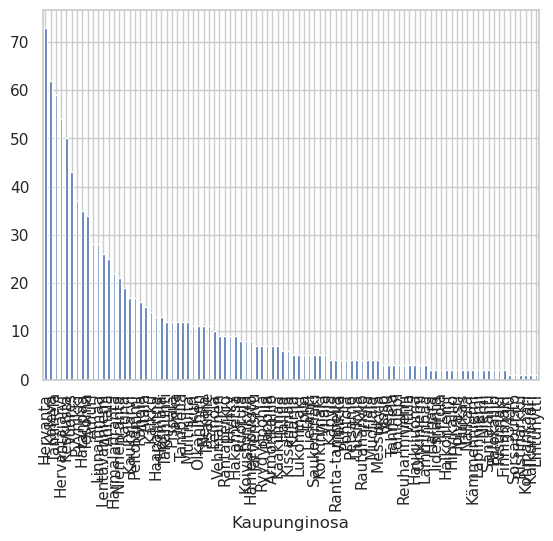

In [229]:
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].astype('category')   
df_train['Kaupunginosa'].value_counts().plot(kind='bar') 


/tmp/ipykernel_223848/1405857891.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_train['Kaupunginosa'] = df_train['Kaupunginosa'].replace(pienet_ryhmat, 'Muu')


<Axes: xlabel='Kaupunginosa'>

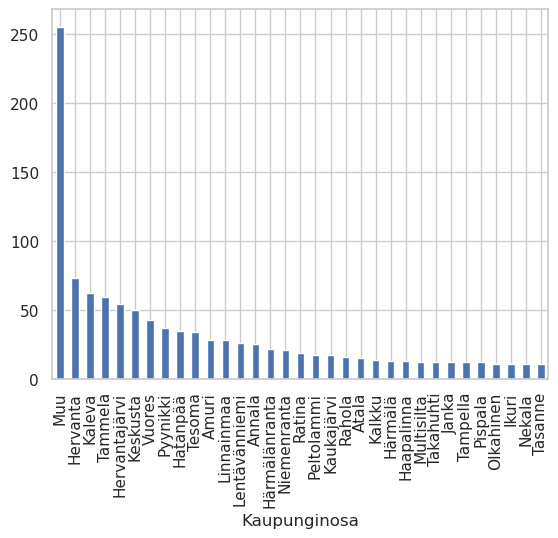

In [230]:
raja_arvo = 0.01
maarat = df_train['Kaupunginosa'].value_counts(normalize=True)
pienet_ryhmat = maarat[maarat < raja_arvo].index
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].replace(pienet_ryhmat, 'Muu')
df_train['Kaupunginosa'].value_counts().plot(kind='bar')

In [231]:
df_train['Kaupunginosa'].value_counts()

Kaupunginosa
Muu              255
Hervanta          73
Kaleva            62
Tammela           59
Hervantajärvi     54
Keskusta          50
Vuores            43
Pyynikki          37
Hatanpää          35
Tesoma            34
Amuri             28
Linnainmaa        28
Lentävänniemi     26
Annala            25
Härmälänranta     22
Niemenranta       21
Ratina            19
Peltolammi        17
Kaukajärvi        17
Rahola            16
Atala             15
Kalkku            14
Härmälä           13
Haapalinna        13
Multisilta        12
Takahuhti         12
Janka             12
Tampella          12
Pispala           12
Olkahinen         11
Ikuri             11
Nekala            11
Tasanne           11
Name: count, dtype: int64

In [232]:
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].astype('category')
df_train['Kaupunginosa'] = df_train['Kaupunginosa'].cat.codes
df_train['Kaupunginosa'].value_counts()

Kaupunginosa
0     255
6      73
12     62
28     59
7      54
15     50
32     43
24     37
5      35
31     34
17     28
1      28
16     26
2      25
9      22
20     21
26     19
22     17
14     17
25     16
3      15
13     14
8      13
4      13
27     12
11     12
29     12
18     12
23     12
10     11
19     11
21     11
30     11
Name: count, dtype: int64

In [233]:
df_train['Asunnon tyyppi'].value_counts()

Asunnon tyyppi
Kaksi huonetta                463
Kolme huonetta                262
Yksiö                         204
Neljä huonetta tai enemmän    151
Name: count, dtype: int64

In [234]:
tyyppimat = {
    'Yksiö' : 1,
    'Kaksi huonetta' : 2,
    'Kolme huonetta' : 3,
    'Neljä huonetta tai enemmän' : 4
}
df_train['Asunnon tyyppi'] = df_train['Asunnon tyyppi'].map(tyyppimat)
df_train['Asunnon tyyppi'].value_counts()

Asunnon tyyppi
2    463
3    262
1    204
4    151
Name: count, dtype: int64

In [235]:
df_train['Huoneisto'].value_counts()

Huoneisto
2h, kt                34
2h+k                  20
3h, k, s              19
1h, kt                15
3h+k+s                14
2h+k+s                13
2h, k, kph, s, ...    12
3h, kt, s             12
2h,k,s                12
2h+kk                 11
2h, k, kph, vh,...    10
4h, k, s               9
1h+kt+kph+lasit...     9
2h, k                  8
2h, k, kph/wc, ...     8
1h, kt, alk            8
3h, k, kph, s, ...     8
1h, kk                 7
4h+k+s                 7
1h, kt, kph, rp        7
2h, k, p               6
2h, k, s               6
1h, k                  6
2h,k                   6
2h,k,p                 5
2h+kk+s                5
3h,k                   5
2h, kt, s, parv...     5
1h+kk                  5
3h+k                   5
1h+k                   5
2h+kt+kph+lasit...     5
3h,k,s                 5
1h, kk, kph            5
3h, k, vh, kph/...     5
2h, kk                 4
1H+KT                  4
4h,k,s                 4
2h+k+kph+s+lasit.p     4
2h, k, kph/s, w

In [236]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.lower()
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace(' ', '')
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('+', ',')
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('...', "")
df_train['Huoneisto'].value_counts()


Huoneisto
3h,k,s                39
2h,kt                 37
2h,k                  35
2h,k,s                34
1h,kt                 26
4h,k,s                21
2h,kk                 17
2h,k,p                16
3h,kt,s               15
1h,k                  15
1h,kk                 15
3h,k                  14
2h,k,kph,s,           12
2h,k,s,p              11
2h,k,kph,vh,          10
1h,kt,kph,lasit        9
2h,kk,s                9
1h,kt,alk              8
2h,k,kph/wc,           8
3h,k,kph,s,            8
1h,kt,kph,rp           7
2h,kk,kph              7
3h,k,s,p               6
2h,k,kph,p             6
2h,kt,kph,lasit        6
2h,kt,s,parv           5
3h,k,vh,kph/           5
1h,kk,kph              5
2h,kt,s                5
3h,k,p                 5
1h,k,kph               4
2h,avokeitti          4
2h,k,kph               4
2h,kk,s,p              4
2h,k,kph,s,lasit.p     4
1h,kt,kph,parvi        4
1h,kt,kph,la           4
2h,k,kph/wc            4
4h,k,p                 4
2h,k,kph,vh,p  

In [237]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('/', ',')
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('[0-9]+h', '', regex=True)
df_train['Huoneisto'].value_counts()

Huoneisto
,k,s                96
,k                  66
,kt                 63
,kk                 33
,k,p                26
,k,kph,s,           26
,kt,s               23
,k,s,p              17
,k,kph,wc,          16
,kt,kph,lasit       15
,kk,s               13
,k,kph,vh,          12
,kk,kph             12
,k,kph,p            10
,k,kph              10
,k,vh,kph,          10
,k,kph,wc            9
,kt,alk              8
,k,rt,kph,           7
,kt,s,parv           7
,kt,kph,rp           7
,k,s,las.parv.       6
,k,kph,s,eril        5
,k,wc,kph,           5
,avokeitti&#         5
,kt,lasitet          5
,k,kph,vh,p          5
,k,kph,s,khh,        5
,kt,p                4
,k,lasitett          4
,k,rt,s,p            4
4-,kt,2xkp           4
,k,kph,vh,las        4
,k,lasitettu         4
,kk,s,p              4
,kt,kph,la           4
,kt,s,p              4
,kt,parveke          4
,kk,kph,wc,          4
,kt,kh,wc,           4
,k,kph,s,w           4
,kt,kph,parvi        4
,avokeitti          4
,

In [238]:
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('^,', '',regex=True)
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('^[-0-9]+', '',regex=True)
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace(',$', '',regex=True)
df_train['Huoneisto'] = df_train['Huoneisto'].str.replace('^,', '',regex=True)
df_train['Huoneisto'].value_counts()

Huoneisto
k,s                98
k                  68
kt                 63
kk                 33
k,p                28
k,kph,s            28
k,kph,wc           25
kt,s               24
k,s,p              17
kt,kph,lasit       15
k,kph,vh           15
kk,s               13
kk,kph             12
k,kph              11
k,vh,kph           11
k,kph,p            10
kt,alk              8
k,rt,kph            7
kt,kph,rp           7
kt,s,parv           7
k,wc,kph            6
k,s,las.parv.       6
avokeitti&#         5
k,s,kph             5
kk,kph,wc           5
k,kph,s,eril        5
k,kph,vh,p          5
k,kph,s,khh         5
k,s,ph              5
kt,kh,wc            5
kt,lasitet          5
kt,s,p              5
kt,parveke          4
kk,alkovi           4
k,kph,vh,las        4
kt,p                4
k,rt,s,p            4
kk,kph,s            4
kt,kph,parvi        4
kt,kph,la           4
k,lasitett          4
kt,2xkp             4
k,kph,s,w           4
avokeitti          4
k,lasitettu         4


In [239]:
huoneisto_split = df_train['Huoneisto'].str.split(',')
exploded = huoneisto_split.explode()
# exploded_unique = exploded.nunique()
exploded_unique_count = exploded.value_counts()
print(f"Unique values: {exploded_unique_count}")


Unique values: Huoneisto
k               654
kph             419
s               409
kt              251
kk              139
wc              125
p               107
vh              100
et               32
kh               32
rt               30
ph               28
w                22
alk              20
khh              18
lasit            16
parveke          16
alkovi           16
l                14
parv             13
avok             13
las              13
oh               11
rp               10
parvi            10
v                 9
lasit.p           8
2wc               8
mh                8
la                8
eril              8
lasitet           8
tk                8
lasitett          7
las.parv.         7
kp                6
psh               6
lasitettu         6
lasit.p.          6
2vh               5
lasi              5
ra                5
las.p             5
th                5
avokeitti&#       5
2xwc              5
ak                4
2                 4
al             

In [240]:
# Käytetään wikisivustoa https://fi.wikipedia.org/wiki/Luettelo_asuntokaupassa_k%C3%A4ytett%C3%A4vist%C3%A4_lyhenteist%C3%A4 termeille 

import re

huoneisto_split = df_train['Huoneisto'].str.split(',')

huoneisto_split = huoneisto_split.apply(lambda lst: ["parveke" if  re.search('^p$|^parv$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["wc" if  re.search('^w$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["sauna" if  re.search('^s$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["2wc" if  re.search('^erill.wc$|^2xwc$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["kph" if  re.search('^kh$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["alkovi" if  re.search('^alk$', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["lasit" if  re.search('^l', item) else item for item in lst])
huoneisto_split = huoneisto_split.apply(lambda lst: ["avok" if  re.search('^avokeitti&#$', item) else item for item in lst])


exploded = huoneisto_split.explode()
exploded_lkm = exploded.value_counts()
print(f"Unique values: {exploded_lkm}")

Unique values: Huoneisto
k               654
kph             451
sauna           413
kt              251
wc              147
kk              139
parveke         136
lasit           115
vh              100
alkovi           36
et               32
rt               30
ph               28
avok             18
khh              18
2wc              15
oh               11
rp               10
parvi            10
v                 9
eril              8
tk                8
mh                8
psh               6
kp                6
2vh               5
ra                5
th                5
ak                4
2                 4
avokeitti        4
h                 4
al                4
aula              4
2xkp              4
2x                3
eril.wc           3
te                3
eri               3
2kph              3
tupak             3
tkh               3
takkah            3
ransk.p           3
erill             3
tupakeitt         3
t                 3
e                 3
terassi        

In [241]:
minimi_lkm = 10
suodatetut_idx = exploded_lkm[exploded_lkm >= minimi_lkm].index
suodatettu_lista = huoneisto_split.apply(lambda lst: [item for item in lst if item in suodatetut_idx])
suodatettu_lista = suodatettu_lista.apply(lambda lst: ["määrittämätön"] if len(lst) == 0 else lst)

df_train['Huoneisto'] = suodatettu_lista.apply(lambda lst: ','.join(lst))

# Tarkistetaan vielä vähän tymästi, että onko kaikki kunnossa
huoneisto_split = df_train['Huoneisto'].str.split(',')
exploded = huoneisto_split.explode()
exploded_lkm = exploded.value_counts()
print(f"Uniikit arvot values: {exploded_lkm}")
print(f"Määrä arvot: {exploded_lkm.count()}")


Uniikit arvot values: Huoneisto
k                654
kph              451
sauna            413
kt               251
wc               147
kk               139
parveke          136
lasit            115
vh               100
alkovi            36
et                32
rt                30
ph                28
khh               18
avok              18
määrittämätön     15
2wc               15
oh                11
rp                10
parvi             10
Name: count, dtype: int64
Määrä arvot: 20


In [242]:
df_train['Huoneisto'].head(10)

0       kt,sauna,parveke
1                     kt
2       kt,sauna,parveke
3            k,vh,kph,wc
4    kk,sauna,ph,parveke
5            k,et,kph,wc
6                     kt
7           kt,kph,lasit
8                k,sauna
9                     kk
Name: Huoneisto, dtype: object

In [243]:
print(df_train.shape)
# Splitataan 'Huoneisto' -sarake ja muunnetaan se listaksi pilkun perusteella
split_data = df_train['Huoneisto'].str.split(',')

# Käytetään explode()-metodia muuntaaksemme listan elementit omiksi riveikseen
exploded_data = split_data.explode()

# Valinnainen: Suodatetaan pois harvinaiset kategoriat ennen one-hot-enkoodausta
# value_counts = exploded_data.value_counts()
# to_keep = value_counts[value_counts >= 5].index
# filtered_data = exploded_data[exploded_data.isin(to_keep)]

# Suoritetaan one-hot-enkoodaus
one_hot_encoded = pd.get_dummies(exploded_data)

# Summataan yhteen samat rivit, koska explode() luo useita rivejä samalle alkuperäiselle indeksille
one_hot_summed = one_hot_encoded.groupby(one_hot_encoded.index).sum()

# Yhdistetään one-hot-enkoodatut sarakkeet takaisin alkuperäiseen DataFrameen
df_train = df_train.join(one_hot_summed)

print(df_train.shape)

print(df_train.head(10))


(1080, 12)
(1080, 32)
   Kaupunginosa            Huoneisto Talot.    m2    Rv   Krs  Hissi  Kunto  \
0            20     kt,sauna,parveke     kt  50.0  2020   2/6      1      3   
1            32                   kt     kt  28.0  2018   1/4      1      3   
2            20     kt,sauna,parveke     kt  63.0  2020   3/6      1      3   
3            15          k,vh,kph,wc     kt  84.0  1964   5/7      1      0   
4             6  kk,sauna,ph,parveke     kt  52.0  1995   6/6      1      2   
5            12          k,et,kph,wc     kt  56.0  1958   4/4      0      0   
6            27                   kt     kt  40.0  2022   2/6      1      0   
7            12         kt,kph,lasit     kt  23.5  2022  7/13      0      3   
8             0              k,sauna     rt  45.0  1989   1/1      0      3   
9            26                   kk     kt  38.0  2011   4/5      1      0   

   Asunnon tyyppi  Pituusaste  Leveysaste  Hinta  2wc  alkovi  avok  et  k  \
0               2   23.696606 

In [244]:
df_train["Talot."].value_counts()
df_train["Talot."] = df_train["Talot."].astype('category')
df_train["Talot."] = df_train["Talot."].cat.codes
df_train["Talot."].value_counts()

Talot.
0    883
2    162
1     35
Name: count, dtype: int64

In [245]:
df_train["Krs"].value_counts()


Krs
1/1      83
1/2      64
2/2      55
4/6      38
3/5      37
3/3      36
5/5      35
4/4      33
5/6      32
2/5      32
2/6      30
2/3      30
1/3      30
3/6      27
6/6      26
2/4      25
4/7      24
4/5      24
1/5      23
3/4      21
5/7      20
3/7      20
1/6      19
2/7      19
7/7      17
7/8      17
-1/2     17
2/8      16
5/8      15
1/4      15
6/7      15
4/8      14
3/8      14
6/8      12
1/7      12
8/8      10
-1/1      8
9/9       5
1/8       5
6/9       4
7/9       3
4/9       3
5/9       3
-1/3      3
2/9       3
12/16     3
10/16     2
7/13      2
11/16     2
10/13     2
2/1       1
10/10     1
10/17     1
7/12      1
5/21      1
14/16     1
8/13      1
9/16      1
4/13      1
8/9       1
3/9       1
1/9       1
6/14      1
Name: count, dtype: int64

In [246]:
df_train["Krs"].isnull().sum()
df_train["Krs"] = df_train["Krs"].fillna("0/0")

In [247]:
df_train["Krs"] = df_train["Krs"].str.replace('^-', '', regex=True)
df_train["Krs"].head()

0    2/6
1    1/4
2    3/6
3    5/7
4    6/6
Name: Krs, dtype: object

In [248]:
kerros_split = df_train["Krs"].str.split('/', expand=True)  
df_train["kerros"] = kerros_split[0].astype(int)
df_train["max_kerros"] = kerros_split[1].astype(int)    

In [249]:
df_train.head(10)

,Kaupunginosa,Huoneisto,Talot.,m2,Rv,Krs,Hissi,Kunto,Asunnon tyyppi,Pituusaste,Leveysaste,Hinta,2wc,alkovi,avok,et,k,khh,kk,kph,kt,lasit,määrittämätön,oh,parveke,parvi,ph,rp,rt,sauna,vh,wc,kerros,max_kerros
0,20,"kt,sauna,parveke",0,50.0,2020,2/6,1,3,2,23.696606,61.524269,300,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,2,6
1,32,kt,0,28.0,2018,1/4,1,3,1,23.804092,61.433185,162,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4
2,20,"kt,sauna,parveke",0,63.0,2020,3/6,1,3,3,23.696636,61.519368,363,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,3,6
3,15,"k,vh,kph,wc",0,84.0,1964,5/7,1,0,3,24.062369,61.463896,483,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,5,7
4,6,"kk,sauna,ph,parveke",0,52.0,1995,6/6,1,2,2,23.848751,61.446601,174,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,6,6
5,12,"k,et,kph,wc",0,56.0,1958,4/4,0,0,3,23.806857,61.498845,276,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,4
6,27,kt,0,40.0,2022,2/6,1,0,2,23.858188,61.499247,246,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,6
7,12,"kt,kph,lasit",0,23.5,2022,7/13,0,3,1,23.806872,61.499177,231,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,7,13
8,0,"k,sauna",2,45.0,1989,1/1,0,3,2,23.837523,61.625291,165,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
9,26,kk,0,38.0,2011,4/5,1,0,1,23.765501,61.493427,309,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5


In [250]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaupunginosa    1080 non-null   int8   
 1   Huoneisto       1080 non-null   object 
 2   Talot.          1080 non-null   int8   
 3   m2              1080 non-null   float64
 4   Rv              1080 non-null   int64  
 5   Krs             1080 non-null   object 
 6   Hissi           1080 non-null   int8   
 7   Kunto           1080 non-null   int64  
 8   Asunnon tyyppi  1080 non-null   int64  
 9   Pituusaste      1080 non-null   float64
 10  Leveysaste      1080 non-null   float64
 11  Hinta           1080 non-null   int64  
 12  2wc             1080 non-null   int64  
 13  alkovi          1080 non-null   int64  
 14  avok            1080 non-null   int64  
 15  et              1080 non-null   int64  
 16  k               1080 non-null   int64  
 17  khh             1080 non-null   i

In [251]:
df_train_filtered = df_train.drop(['Huoneisto', 'Krs'], axis=1)
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaupunginosa    1080 non-null   int8   
 1   Talot.          1080 non-null   int8   
 2   m2              1080 non-null   float64
 3   Rv              1080 non-null   int64  
 4   Hissi           1080 non-null   int8   
 5   Kunto           1080 non-null   int64  
 6   Asunnon tyyppi  1080 non-null   int64  
 7   Pituusaste      1080 non-null   float64
 8   Leveysaste      1080 non-null   float64
 9   Hinta           1080 non-null   int64  
 10  2wc             1080 non-null   int64  
 11  alkovi          1080 non-null   int64  
 12  avok            1080 non-null   int64  
 13  et              1080 non-null   int64  
 14  k               1080 non-null   int64  
 15  khh             1080 non-null   int64  
 16  kk              1080 non-null   int64  
 17  kph             1080 non-null   i

In [252]:
from sklearn.model_selection import train_test_split

X = df_train_filtered.drop('Hinta', axis=1)
y = df_train_filtered['Hinta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)




from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Luodaan lineaarisen regressiomallin instanssi
lr = LinearRegression()

# Suoritetaan ristiinvalidointi
# cv määrittää ristiinvalidoinnin jakojen määrän

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean squared error: {mse:.2f}\nMean absolute error: {mae:.2f}")
print(f"Parhaan mallin R²-arvo: {r2}")




Mean squared error: 5890.74
Mean absolute error: 57.92
Parhaan mallin R²-arvo: 0.5459687325617417


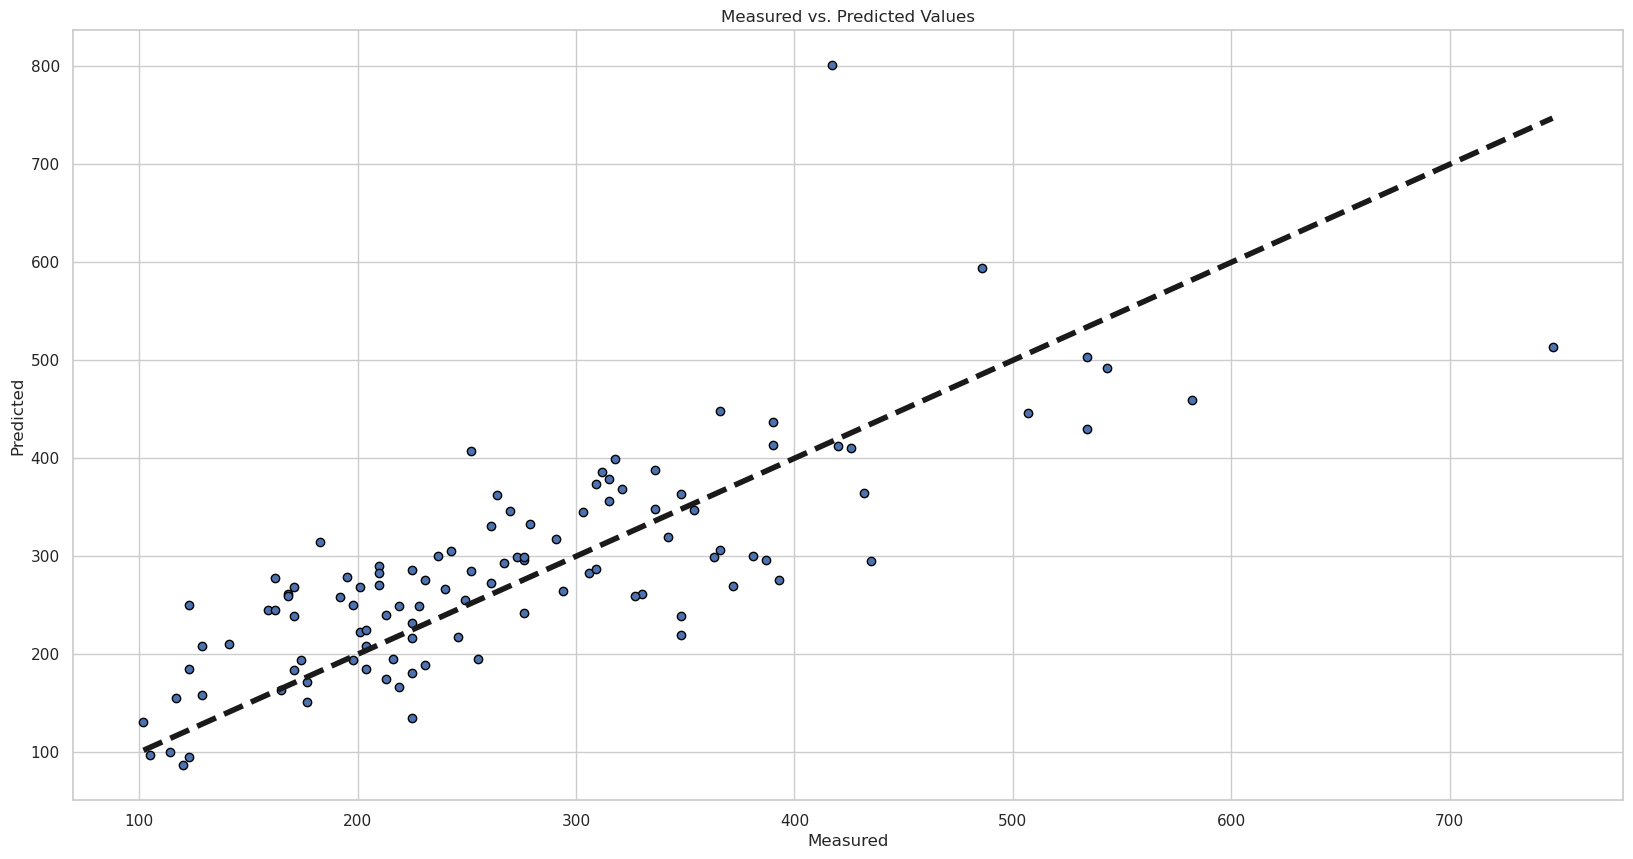

In [253]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()


Fitting 10 folds for each of 4200 candidates, totalling 42000 fits
With error: neg_mean_absolute_error
Ositus 0: 25.21602506053691
Ositus 1: 32.426402344995616
Ositus 2: 33.45357851638008
Ositus 3: 29.299638256584245
Ositus 4: 32.450500802895455
Ositus 5: 28.771882833893766
Ositus 6: 38.68467791055895
Ositus 7: 27.445788353988803
Ositus 8: 30.422312077787733
Ositus 9: 28.54337664731999
Mean squared error: 1411.57
Mean absolute error: 26.70
Parhaan mallin R²-arvo: 0.8912


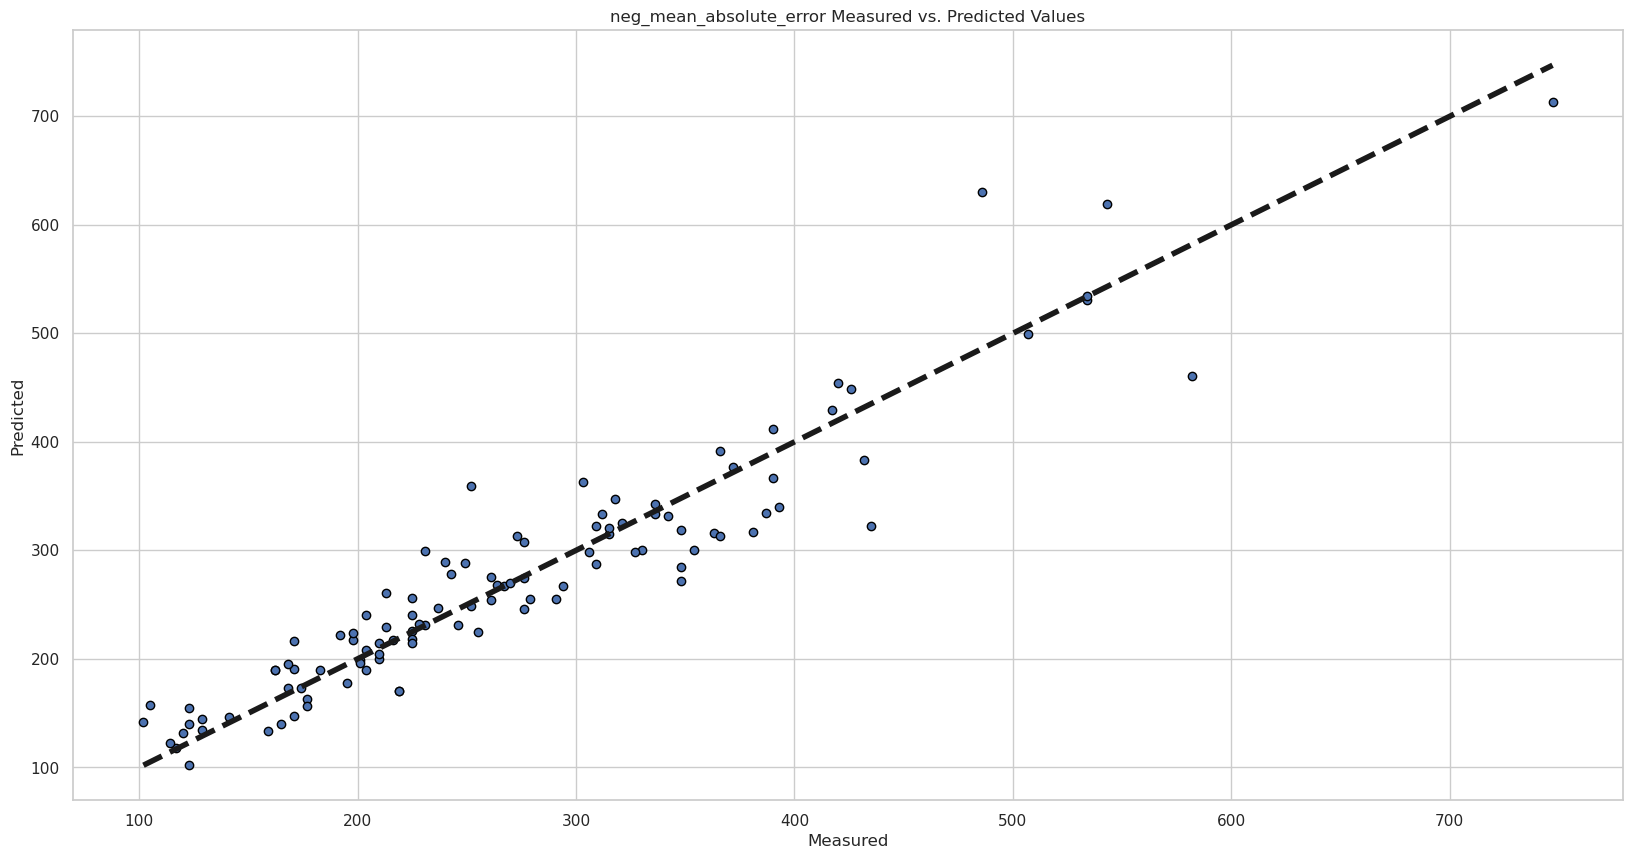

Fitting 10 folds for each of 4200 candidates, totalling 42000 fits
With error: neg_mean_squared_error
Ositus 0: 27.498042515345983
Ositus 1: 32.23613591096839
Ositus 2: 29.82644087014739
Ositus 3: 29.36360160591676
Ositus 4: 28.270039666559278
Ositus 5: 27.593916509569304
Ositus 6: 34.5243424877678
Ositus 7: 28.855719025602045
Ositus 8: 29.38933657616684
Ositus 9: 29.063554193555696
Mean squared error: 1303.05
Mean absolute error: 26.02
Parhaan mallin R²-arvo: 0.8996


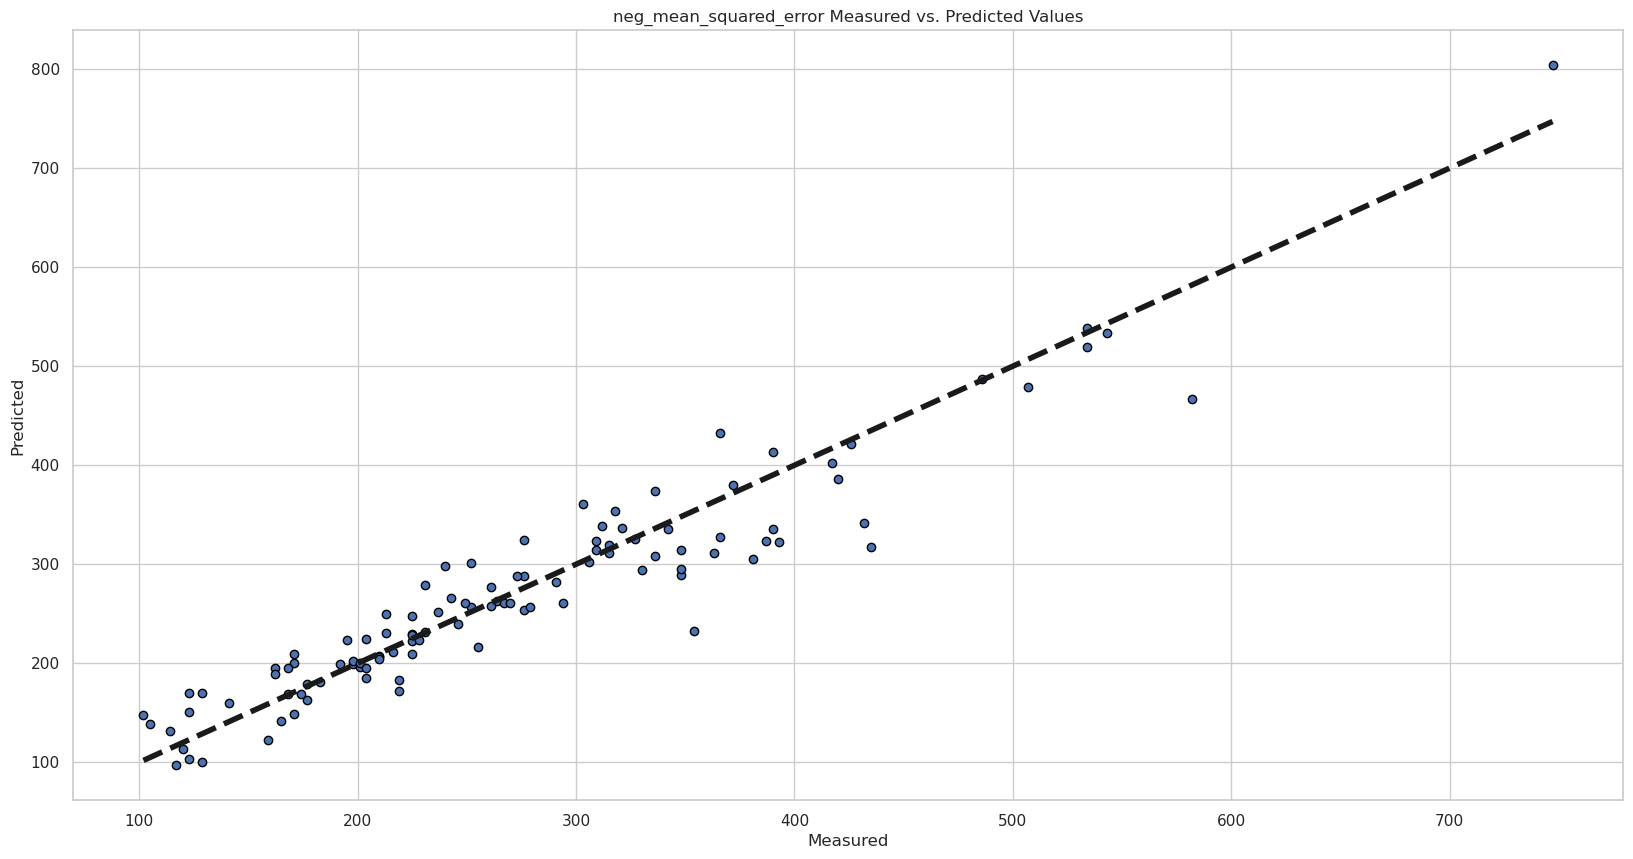

In [254]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

virhe_mallit = [xgboost.XGBRegressor(objective='reg:absoluteerror'), xgboost.XGBRegressor(objective='reg:squarederror')]
virhe_nimi = ['neg_mean_absolute_error', 'neg_mean_squared_error']

for idx, malli in enumerate(virhe_mallit):

    param_space = {
        'n_estimators': np.arange(1, 500, 10),
        'max_depth': np.arange(3, 11),
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 1.5, 2]
    }

    random_search = RandomizedSearchCV(
        estimator=malli,
        param_distributions=param_space,
        cv=5,
        n_jobs=-2,
        n_iter= 10, 
        verbose=1,   
        scoring='neg_mean_absolute_error' 
    )

    
    random_search.fit(X_train, y_train)

    best_index = random_search.best_index_
    cv_results = random_search.cv_results_
    cv_splits = random_search.cv
    best_scores = [cv_results[f'split{i}_test_score'][best_index] for i in range(cv_splits)]


    print(f"With error: {virhe_nimi[idx]}")
    for i, score in enumerate(best_scores):
        print(f"Ositus {i}: {-score}") 


    best_model = random_search.best_estimator_
    predictions = best_model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean squared error: {mse:.2f}\nMean absolute error: {mae:.2f}\nParhaan mallin R²-arvo: {r2:.4f}")

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(f'{virhe_nimi[idx]} Measured vs. Predicted Values')
    plt.show()


In [265]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 

robust_scaler = RobustScaler()
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
df_train_NN = df_train_filtered.copy()
df_train_NN[['Pituusaste', 'Leveysaste']] = minmax_scaler.fit_transform(df_train_NN[['Pituusaste', 'Leveysaste']])
df_train_NN['Rv'] = minmax_scaler.fit_transform(df_train_NN[['Rv']])
df_train_NN['m2'] = minmax_scaler.fit_transform(df_train_NN[['m2']])


df_hot = pd.get_dummies(df_train_NN['Kaupunginosa'], prefix='Kaupunginosa').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['kerros'], prefix='kerros').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['max_kerros'], prefix='max_kerros').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['Kunto'], prefix='Kunto').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['Hissi'], prefix='Hissi').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN['Asunnon tyyppi'], prefix='Asunnon tyyppi').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)

df_hot = pd.get_dummies(df_train_NN["Talot."], prefix='Talot.').astype('int')
df_train_NN = pd.concat([df_train_NN, df_hot], axis=1)


df_train_NN.drop(['Kaupunginosa', 'kerros', 'max_kerros', 'Kunto', 'Hissi', 'Asunnon tyyppi', "Talot."], axis=1, inplace=True)




,m2,Rv,Pituusaste,Leveysaste,Hinta,2wc,alkovi,avok,et,k,khh,kk,kph,kt,lasit,määrittämätön,oh,parveke,parvi,ph,rp,rt,sauna,vh,wc,Kaupunginosa_0,Kaupunginosa_1,Kaupunginosa_2,Kaupunginosa_3,Kaupunginosa_4,Kaupunginosa_5,Kaupunginosa_6,Kaupunginosa_7,Kaupunginosa_8,Kaupunginosa_9,Kaupunginosa_10,Kaupunginosa_11,Kaupunginosa_12,Kaupunginosa_13,Kaupunginosa_14,Kaupunginosa_15,Kaupunginosa_16,Kaupunginosa_17,Kaupunginosa_18,Kaupunginosa_19,Kaupunginosa_20,Kaupunginosa_21,Kaupunginosa_22,Kaupunginosa_23,Kaupunginosa_24,Kaupunginosa_25,Kaupunginosa_26,Kaupunginosa_27,Kaupunginosa_28,Kaupunginosa_29,Kaupunginosa_30,Kaupunginosa_31,Kaupunginosa_32,kerros_0,kerros_1,kerros_2,kerros_3,kerros_4,kerros_5,kerros_6,kerros_7,kerros_8,kerros_9,kerros_10,kerros_11,kerros_12,kerros_14,max_kerros_0,max_kerros_1,max_kerros_2,max_kerros_3,max_kerros_4,max_kerros_5,max_kerros_6,max_kerros_7,max_kerros_8,max_kerros_9,max_kerros_10,max_kerros_12,max_kerros_13,max_kerros_14,max_kerros_16,max_kerros_17,max_kerros_21,Kunto_0,Kunto_1,Kunto_2,Kunto_3,Hissi_0,Hissi_1,Asunnon tyyppi_1,Asunnon tyyppi_2,Asunnon tyyppi_3,Asunnon tyyppi_4,Talot._0,Talot._1,Talot._2
0,0.153846,0.972222,0.235553,0.475689,300,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,0.064777,0.958333,0.455149,0.014923,162,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0
2,0.206478,0.972222,0.235616,0.450897,363,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0
3,0.291498,0.583333,0.982808,0.170282,483,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
4,0.161943,0.798611,0.546388,0.082794,174,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
5,0.178138,0.541667,0.460797,0.347079,276,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
6,0.113360,0.986111,0.565667,0.349108,246,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
7,0.046559,0.986111,0.460829,0.348755,231,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0
8,0.133603,0.756944,0.523448,0.986724,165,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
9,0.105263,0.909722,0.376307,0.319671,309,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0


In [ ]:

X = df_train_NN.drop('Hinta', axis=1)
y = df_train_NN['Hinta']

X = X.to_numpy()
y = y.to_numpy()

In [304]:
import tensorflow as tf
from keras_tuner import BayesianOptimization
from keras import regularizers, Sequential, layers, optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 
from tensorflow import keras
import time
from keras import initializers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

search_time_start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
models_bayes = []
mse_scores = []
mae_scores = []
r2_scores = []

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))
    
    max_neurons = [512,256,128]
    min_neurons = [1,1,1]
    step_neurons = [32,16,8]

    initializer_name = hp.Choice(f'initializer', values=['he_normal', 'glorot_uniform', 'lecun_normal', 'glorot_normal'])
    if initializer_name == 'he_normal':
        initializer = initializers.HeNormal()
    elif initializer_name == 'glorot_uniform':
        initializer = initializers.GlorotUniform()
    elif initializer_name == 'lecun_normal':
        initializer = initializers.LecunNormal()
    else:
        initializer = initializers.GlorotNormal()

    for idx, i in enumerate(range(3)):
        
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=min_neurons[idx], max_value=max_neurons[idx], step=step_neurons[idx]),
            activation=hp.Choice(f'activation_{i}', values=['relu', 'linear', "selu", "elu"]),
            kernel_regularizer=regularizers.l1_l2(
                l1=hp.Float(f'l1_reg_{i}', min_value=1e-6, max_value=1, sampling='log'),
                l2=hp.Float(f'l2_reg_{i}', min_value=1e-6, max_value=1, sampling='log')),
            kernel_initializer=initializer
                )
            )
            
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.05)))

    model.add(layers.Dense(1, activation='linear'))

    optimizer_choice = hp.Choice('optimizer', values=['rmsprop', 'nadam', 'AdaMax'])
    learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
        
    if optimizer_choice == 'rmsprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'nadam':
        optimizer = optimizers.Nadam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.Adamax(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mse')
    return model

# Initialize the Bayesian Optimization tuner


early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    mode='min',
    verbose=1
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.7,  # New learning rate = learning rate * factor
    patience=5,  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

terminate_on_nan = TerminateOnNaN()

best_hyperparameters_bayes = []

start_time = time.time()
kf = KFold(n_splits=5)
models_bayes = []
round = 0


for train_index, val_index in kf.split(X_train):

    tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=42, 
    executions_per_trial=1,
    directory='NN_search',
    project_name='kt_bayesian',
    overwrite=True,
    max_consecutive_failed_trials=100,
    max_retries_per_trial = 0
)
    
    start_time = time.time()
    X_train_b, X_val_b = X_train[train_index], X_train[val_index]    
    y_train_b, y_val_b = y_train[train_index], y_train[val_index]
    y_train_b = tf.data.Dataset.from_tensor_slices(y_train_b)
    X_train_b = tf.data.Dataset.from_tensor_slices(X_train_b)
    train_dataset = tf.data.Dataset.zip((X_train_b, y_train_b)).batch(64)
    train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
    
    tuner.search(
        train_dataset,
        epochs=200,
        validation_data=(X_val_b, y_val_b),
        callbacks=[early_stopping_callback, reduce_lr_callback, terminate_on_nan],
        verbose=2
    )

    end_time = time.time()
    elapsed_time = end_time - start_time


    best_model = tuner.get_best_models(num_models=1)[0]
    models_bayes.append(best_model)
    best_hyperparameters_bayes.append(tuner.get_best_hyperparameters(num_trials=1)[0])

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Tallenna suorituskykymetriikat
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

search_time_end = time.time()
print(f"Bayesian search took {search_time_end - search_time_start} seconds")

# Tulosetaan kaikki tulokset alkuun
for idx, (mae, mse, r2) in enumerate(zip(mae_scores, mse_scores, r2_scores), start=1):
    print(f"Model {idx} - MAE: {mae}, MSE: {mse}, R2: {r2}")

# Piirretään tuloksista kuvaaja eri malleille
plt.figure(figsize=(20, 10))
for i, (mse, mae, r2) in enumerate(zip(mse_scores, mae_scores, r2_scores), start=1):
    plt.scatter(['MSE', 'MAE', 'R2'], [mse, mae, r2], label=f'Model {i}')
plt.title('Model Performance')
plt.ylabel('Score')
plt.legend()
plt.show()


# Käydään vielä eri mallit lävitse selvyyden vuoksi
for idx, model in enumerate(models_bayes):

    predictions = model.predict(X_test)
    plt.figure(figsize=(20, 10)) 
    plt.scatter(y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')  
    plt.ylabel('Predicted') 
    plt.title('Measured vs. Predicted Values')
    plt.show()

    print(f"Fold {idx} - MSE: {mse_scores[idx]}, MAE: {mae_scores[idx]}, R2: {r2_scores[idx]}")
    hp = best_hyperparameters_bayes[idx]
    print(f"Best hyperparameters for model {i+1}:")
    for key in hp.values:
        print(f"{key}: {hp.get(key)}")
    print("-" * 50)
    model.summary()




Trial 13 Complete [00h 00m 04s]
val_loss: 3398.153564453125

Best val_loss So Far: 3398.153564453125
Total elapsed time: 00h 01m 45s

Search: Running Trial #14

Value             |Best Value So Far |Hyperparameter
lecun_normal      |glorot_normal     |initializer
449               |257               |units_0
linear            |selu              |activation_0
1.6948e-05        |0.00013683        |l1_reg_0
0.03985           |0.0020855         |l2_reg_0
0.3               |0.05              |dropout_0
129               |33                |units_1
selu              |relu              |activation_1
0.01519           |0.0067195         |l1_reg_1
0.81694           |0.043448          |l2_reg_1
0.2               |0.05              |dropout_1
9                 |105               |units_2
elu               |selu              |activation_2
0.00053423        |0.14947           |l1_reg_2
0.040586          |0.0056979         |l2_reg_2
0.05              |0.4               |dropout_2
AdaMax            |